<small><i>This notebook is a reviewed English version (2020) of "*03.1b-Ley-de-Luhn.ipynb*" on the collection [nlp_pydata2018 on GitHub](https://github.com/sorice/nlp_pydata2018/).</i></small>

# Advanced Preprocessing: Luhn Eg.

This section is an advanced section on NLP and its basic processes. To 
reach the goal of this notebook you must know how to filter the stopwords 
which are words without semantic content and the most frequent ones, also 
how to steamm word suffixes. In any of those cases, statistics are essential 
for the algorithm or for the learning mechanism to be used, and in every 
step we can see how the number of words is reduced trying to find the most 
important ones.

Let's now look at an example of NLP very close related to the field of 
_Information Retrieval_. It is all about **Luhn's Law** [2], or the problem 
of finding the boundaries of the most important words in a document, usually 
for long texts like books.

## Roadmap Summary

###  Datasets

For all the examples, two books will be used, one in English and the 
other in Spanish. One if the translation of the other, and both are under
Creative Common license. The first is _Free Culture_ and the second is its
Spanish translation _Cultura Libre_.

### Transforming Dataset Texts

Generally, almost all the materials that we have are PDFs and to operate 
with texts in python it is best to use simple text formats like .txt. Then,
how to transform PDF into TXT?

Our recommendation is to use pypdf2 that appears in the GNU / Linux 
repositories and it is a pure python library 
(see [Text Extraction with pdfMiner](https://github.com/sorice/nlp_pydata2018/blob/master/02.1-Text-Extraction-with-PDFMiner.ipynb)). 
If you know any script suitable for this task using the ghostscript 
library, we recommend it over pdftotext. However it is quite difficult 
to find such a custom script for our needs.

The _text-preproc_ library since v0.2 includes a helper function that 
wraps the pypdf2 library to extract the text.


```python
from preprocess.utils.io import pdf
PDF = pdf('/path/to/pdf/file.pdf')
text = PDF.extractText() 
with open('/path/for/new/file.txt','w') as doc:
    doc.write(text)
```

If you are using preprocess v0.1 use _pdftotext_ included in the poppler-utils package.

```bash
~$ pdftotext file.pdf
```

**Result:** file.txt

Keep in mind that text extraction scripts generate .txt files with many 
problems: mainly rare characters. Perhaps it will be more useful for 
the reader to study more specialized applications and libraries for 
this type of word processing problem such as: Apache-Tika, among others. 
However, in the following sections _Transforming text_ some tips can be
found out about how to solve these problems without using large libraries to 
obtain good result in basic NLP subprocess.

## Transforming Text

The next codes transform text to allow the application of statistical analysis to build Luhn model.

In [1]:
import preprocess

In [2]:
from preprocess.data import load_freeculture
from preprocess.demo import preProcessFlow
text = load_freeculture()
text = preProcessFlow(text).lower()
text = preprocess.del_digits(text)

In [3]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("\s+", gaps=True)
tokens = tokenizer.tokenize(text)
print ("Total words: ", len(tokens))

Total words:  120303


En ambos casos se devuelve el total de palabras(o tokens) divididos por el caracter
*espacio*. Sin embargo las palabras en un texto se repiten. ¿Cómo saber las palabras
únicas?

In [4]:
tokens_unique=set([])
tokens_unique = set(tokens)
print ("Unique words:", len(tokens_unique))

Unique words: 8233


As it can be seen in the book of Bird et al.[[1](#Bird2009)] the simplest 
question we can make when we see these numbers are: Which is the average
of words by page? Which is the must used or frequent word? What words
are used only one time? Lets see some ways to calculate that, to get those
goals will be needed some extra functions.

<a id='sect2.5'></a>

In [5]:
#Start a dict to keep the frequence of every word
dict = {}
for word in tokens_unique:
    dict[word]=0
#Dict with word = frequence of word.
for token in tokens:
    dict[token]+=1
#A list of tuples with more info can result in a better resource. List([(Frequence1, word1),(freq2,word2),...])
tupla = []
for word in dict:
    tupla.append([dict[word],word])

This tuple can be ordered like this: because the frequence is in the first
position, the list tupla can be sortered using *tupla[i][0]*.

In [6]:
tupla=sorted(tupla)
print ("The 10 must frequent words are:")
for i in range(1,11):
    print (tupla[-i][1],":",tupla[-i][0])

The 10 must frequent words are:
. : 9178
the : 6909
of : 3479
to : 3180
a : 2408
is : 2198
that : 2052
and : 1922
in : 1718
it : 1276


As can be seen the words are non useful words, or stopwords or the puntuaction sign.

In [7]:
import time
from nltk.corpus import stopwords
timei = time.time()
english_stops = set(stopwords.words('en'))
#This updates are agregated after some experimental observation, because
#normalization process required more analysis time 
english_stops.update(['would','pm','pages','page','th', '_r', 'could','pass','jm_qxd','❚❘','one'])
print(english_stops)

{'some', 'their', 'again', 'itself', 'where', 'pages', 'should', 'while', 'so', 'into', 'me', 'any', 'same', 'with', 'did', 'herself', 'which', 'why', 'ours', 'just', 'were', 'through', 'each', 'being', 'by', 'our', 'its', 'than', 'we', 'it', 'after', 'between', 'would', 'off', 'could', 'don', 'an', 'both', 'over', 'to', 'under', 'more', 'not', 'once', 'having', 'what', 'before', 'one', 'do', 'yourself', 'out', 'this', 'about', 'my', 'his', 'yourselves', 'does', 'because', 'against', 'myself', 'they', 'up', 'here', '_r', 'for', 'nor', 'most', 'jm_qxd', 'yours', 'doing', 'if', 'those', 'all', 'pass', 'when', 'that', 'who', 'of', 'are', 'above', 'them', 'ourselves', 'during', 'be', 'on', 'down', 'themselves', 'only', 'and', 'can', 'these', 'theirs', 'such', 'how', 'but', 'in', 'have', 'your', 'very', 'no', 'hers', 'she', 'whom', 'further', 'i', 's', 'is', 'below', 't', 'the', 'until', 'am', 'few', 'now', 'her', 'will', 'too', 'a', 'from', 'has', 'himself', 'he', 'own', 'you', 'been', 'ot

In [8]:
tokens_afterstops=[]
for k in range(len(tokens)-1):
    if tokens[k] not in english_stops and len(tokens[k])>1:
        tokens_afterstops.append(tokens[k])
timef = time.time()-timei
print ("Stopword filtering time: ",timef)

tokens_unique1 = set(tokens_afterstops)
dict1 = {} #dict con keys = set de tokens after stops
for word in tokens_unique1:
    dict1[word]=0

tupla1 = [] #Creating list of tuples (frequence,word) without stopwords
for token in tokens_afterstops:
    dict1[token]+=1
for word in dict1:
    tupla1.append([dict1[word],word])
tupla1=sorted(tupla1)

print ("Uunique words without stopw:", len(tokens_unique1))
print ("The 10 must frequent words after stopwords filtering are:")
for i in range(1,11):
    print (tupla1[-i][1],":",tupla1[-i][0])
print ("Total words: ", len(tokens))
print ("Total text words without stopwords:", len(tokens_afterstops))
print ("Deleted words after stopwords filtering:", 
len(tokens)-len(tokens_afterstops))

Stopword filtering time:  2.2512850761413574
Uunique words without stopw: 8071
The 10 must frequent words after stopwords filtering are:
copyright : 720
law : 615
free : 441
culture : 374
property : 356
content : 281
right : 246
work : 242
use : 239
internet : 238
Total words:  120303
Total text words without stopwords: 55482
Deleted words after stopwords filtering: 64821


## Luhn Model in Linguistics

Luhn argues that long texts have a logaritmic function behavior or a long
tal function. Where the stopwords are at the beginning and the less 
frequent words are in the long tail. Lets see a graph of the book Free 
Culture. Using the variable _tupla_  the [2.5](#sect2.5) section code 
a _numpy_ array is built and the media($\mu$) and the variance($\sigma$) 
are extrated to be used in future calculations.

In [147]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


14.612291995627354
153.12755040987275
(8233,)


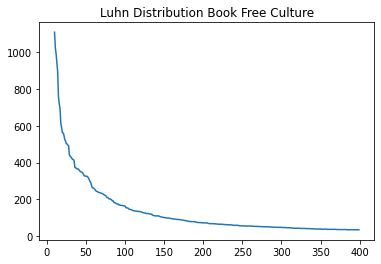

In [43]:
xarray = []
t=numpy.linspace(0,len(tupla),num=len(tupla))
for i in range(len(tupla)):
    xarray.append(tupla[i][0])
xarray.reverse()

x = numpy.array(xarray,dtype=numpy.int16)
mux = x.mean()
sigmax = x.std()
print (mux) 
print (sigmax)
print (x.shape)

plt.plot(t[10:400],x[10:400])
plt.title("Luhn Distribution Book Free Culture")
plt.show()

### Generate a normal distribution based on Zeta.

This step is personal proposal because of the dark in the original
Luhn article [[2](#Luhn1958)] with respect to the boundaries for cutting. 
Some papers consider that in the obtention of these limits there is
certain empirism. Calcs are made based on a nule hypotesis.
[Keith web book, chapter2](http://www.dcs.gla.ac.uk/Keith/Chapter.2/Ch.2.html)

In [140]:
sigma = x_s.std()
mu = x_s.mean()+3*sigma

pdf = (1/(sigma * numpy.sqrt(2 * numpy.pi))
* numpy.exp( - (t - mu)**2 / (2 * sigma**2) ))

perc_05 = int(mu-2*sigma)
perc_95 = int(mu+2*sigma)
print(perc_05, perc_95)
print (mu, sigma)

113 427
270.686232489232 78.46649164766025


In [145]:
x_s = x[(x > 5) & (x < 1000)]
print(x_s.shape)
print(x[113]/(x.max()*pdf[113]))
print(x[427]/(x.max()*pdf[427]))
factor = x[113]/(x.max()*pdf[113]) - x[427]/(x.max()*pdf[427])

(2054,)
22.27677449217962
5.143847691885105


In [142]:
x[113]

138

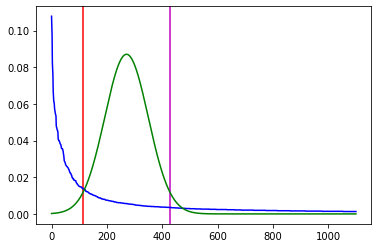

In [146]:
import matplotlib.pyplot as plt
t = np.arange(0,1500,1)
# lower cut-off.
plt.axvline(perc_05,label='05 perc',c='r')
# cut-off.
plt.axvline(perc_95,label='95t perc',c='m')
p=x[10:int(mu)].mean()
#plt.twiny()
#Ploting Zipf distribution
plt.plot(t[:1100],x_s[:1100]/(x.max()), c='b')
#Ploting density function
plt.plot(t[:1100],pdf[:1100]*factor, c='g')
plt.show()


## Must Important Words

In [137]:
print (tupla1[-perc_05][1],":",tupla1[-perc_05][0])
print (tupla1[-perc_95][1],":",tupla1[-perc_95][0])
print ('All important words:', tupla1[len(tupla1)-perc_95:len(tupla1)-perc_05+1])

terms : 67
user : 24
All important words: [[24, 'user'], [24, 'write'], [25, 'ability'], [25, 'ask'], [25, 'based'], [25, 'data'], [25, 'debate'], [25, 'democracy'], [25, 'develop'], [25, 'easily'], [25, 'images'], [25, 'libraries'], [25, 'meaning'], [25, 'napster'], [25, 'person'], [25, 'progress'], [25, 'publishing'], [25, 'regulate'], [25, 'sales'], [25, 'school'], [25, 'stories'], [25, 'text'], [25, 'whose'], [26, 'began'], [26, 'david'], [26, 'effective'], [26, 'effectively'], [26, 'generally'], [26, 'gets'], [26, 'increase'], [26, 'knowledge'], [26, 'limit'], [26, 'movie'], [26, 'office'], [26, 'really'], [26, 'rule'], [26, 'songs'], [26, 'sony'], [26, 'stations'], [26, 'strategy'], [26, 'web'], [27, 'already'], [27, 'becomes'], [27, 'certain'], [27, 'consider'], [27, 'extend'], [27, 'extension'], [27, 'given'], [27, 'interests'], [27, 'kahle'], [27, 'matter'], [27, 'produce'], [27, 'publisher'], [27, 'side'], [27, 'special'], [27, 'station'], [27, 'william'], [27, 'wrote'], [28,

This method is widely used in the generation of automatic summaries. 
It can be used to give weight to the words within the document, and 
extract the most weighted structures: sentences, paragraphs, etc. 
As can be seen in the example of the book "Free Culture", this method 
leaves 300 significant words from 120303 words in the original text.

## References

[1] *[Bird2009]* Steven Bird, Ewan Klain & Edward Loper,. 
Book **Natural Language Processing with Python**. 2009. 
p. 10 **ISBN**: 978-0-596-51649-9

[2] *[Luhn1958]* H.P. Luhn. Paper **The Automatic Creation of Literature Abstract**. 
*IBM Journal*, 1958.

## Alphabetic Index

**Token**: in linguistics is an individual occurrence of a linguistic unit, generally referred as the smallest unit of processing: words, phonemes, n-grams, etc.